Data Collection

In [ ]:
# Import necessary libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\kochs\OneDrive\Desktop\NLP Dataset\data_to_be_cleansed.csv"
df_com1 = pd.read_csv(file_path)

# Display the first few rows
df_com1.head()

,Unnamed: 0,text,title,target
0,0,Welcome to /r/depression's check-in post - a p...,"Regular check-in post, with information about ...",1
1,1,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
2,2,Anyone else just miss physical touch? I crave ...,"I haven’t been touched, or even hugged, in so ...",1
3,3,I’m just so ashamed. Everyone and everything f...,Being Depressed is Embarrassing,1
4,4,I really need a friend. I don't even have a si...,I'm desperate for a friend and to feel loved b...,1


In [ ]:
df_com1 = df_com1.drop(df_com1.columns[0], axis=1)

In [ ]:
df_com1 = df_com1.drop(df_com1.columns[1], axis=1)

In [ ]:
# prompt: Make a new column where 0 = Stress, 1 = Depression, 2 = Bipolar disorder, 3 = Personality disorder, 4 = Anxiety

def map_target(target):
  if target == 0:
    return "Stress"
  elif target == 1:
    return "Depression"
  elif target == 2:
    return "Bipolar disorder"
  elif target == 3:
    return "Personality disorder"
  elif target == 4:
    return "Anxiety"
  else:
    return None  # Handle unexpected values if needed

df_com1['target_ID'] = df_com1['target'].apply(map_target)


In [ ]:
df_com1.head()

,text,target,target_ID
0,Welcome to /r/depression's check-in post - a p...,1,Depression
1,We understand that most people who reply immed...,1,Depression
2,Anyone else just miss physical touch? I crave ...,1,Depression
3,I’m just so ashamed. Everyone and everything f...,1,Depression
4,I really need a friend. I don't even have a si...,1,Depression


In [ ]:
df_com1.shape

(5957, 3)

In [ ]:
df_com1['target'].value_counts()

target
1    1202
3    1201
4    1188
2    1185
0    1181
Name: count, dtype: int64

In [ ]:
df_com1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5957 entries, 0 to 5956
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5607 non-null   object
 1   target     5957 non-null   int64 
 2   target_ID  5957 non-null   object
dtypes: int64(1), object(2)
memory usage: 139.7+ KB


In [ ]:
df_com1['target_ID'].value_counts()

target_ID
Depression              1202
Personality disorder    1201
Anxiety                 1188
Bipolar disorder        1185
Stress                  1181
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\kochs\OneDrive\Desktop\NLP Dataset\Combined Data.csv"
df_com2 = pd.read_csv(file_path)

# Display the first few rows
df_com2.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df_com2.shape

(53043, 3)

In [ ]:
df_com2 = df_com2.drop(df_com2.columns[0], axis=1)

In [ ]:
df_com2.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df_com2['status'].value_counts()

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

In [ ]:
#Replace 0 = Stress, 1 = Depression, 2 = Bipolar disorder, 3 = Personality disorder, 4 = Anxiety

# Create a mapping dictionary for target values
target_mapping = {
    'Stress' :0,
    'Depression': 1,
    'Bipolar': 2,
    'Personality disorder': 3,
    'Anxiety': 4,
    'Suicidal': 5,
    'Normal': 6
}

# Replace the numerical target values with their corresponding labels
df_com2['target'] = df_com2['status'].map(target_mapping)

# Display the updated DataFrame
df_com2.head()


,statement,status,target
0,oh my gosh,Anxiety,4
1,"trouble sleeping, confused mind, restless hear...",Anxiety,4
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,4
3,I've shifted my focus to something else but I'...,Anxiety,4
4,"I'm restless and restless, it's been a month n...",Anxiety,4


In [ ]:
# Move the 'status' column to the last position
cols = list(df_com2.columns)
cols.remove('status')
df_com2 = df_com2[[*cols, 'status']]

# Display the updated DataFrame
df_com2.head()


,statement,target,status
0,oh my gosh,4,Anxiety
1,"trouble sleeping, confused mind, restless hear...",4,Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",4,Anxiety
3,I've shifted my focus to something else but I'...,4,Anxiety
4,"I'm restless and restless, it's been a month n...",4,Anxiety


In [ ]:
# Replace name 'clean_text' with 'text'
df_com2.rename(columns={'statement': 'text'}, inplace=True)
df_com2.rename(columns={'status': 'target_ID'}, inplace=True)
df_com2.head()

,text,target,target_ID
0,oh my gosh,4,Anxiety
1,"trouble sleeping, confused mind, restless hear...",4,Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",4,Anxiety
3,I've shifted my focus to something else but I'...,4,Anxiety
4,"I'm restless and restless, it's been a month n...",4,Anxiety


In [ ]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\kochs\OneDrive\Desktop\NLP Dataset\dataset_anxiety.csv"
df_com3 = pd.read_csv(file_path)

# Display the first few rows
df_com3.head()

,text,label
0,oh my gosh,0.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [ ]:
df_com3.shape

(6982, 2)

In [ ]:
df_com3['label'].value_counts()

label
0.0    5740
1.0    1240
Name: count, dtype: int64

In [ ]:
def map_target(target):
  if target == 0:
    return "Normal"
  elif target == 1:
    return "Anxiety"
  else:
    return None  # Handle unexpected values if needed

df_com3['target_ID'] = df_com3['label'].apply(map_target)

In [ ]:
df_com3.head()

,text,label,target_ID
0,oh my gosh,0.0,Normal
1,"trouble sleeping, confused mind, restless hear...",1.0,Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,Anxiety
3,I've shifted my focus to something else but I'...,1.0,Anxiety
4,"I'm restless and restless, it's been a month n...",1.0,Anxiety


In [ ]:
# Replace name 'clean_text' with 'text'
df_com3.rename(columns={'label': 'target'}, inplace=True)
df_com3.head()

,text,target,target_ID
0,oh my gosh,0.0,Normal
1,"trouble sleeping, confused mind, restless hear...",1.0,Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,Anxiety
3,I've shifted my focus to something else but I'...,1.0,Anxiety
4,"I'm restless and restless, it's been a month n...",1.0,Anxiety


In [ ]:
import praw

# Connect to Reddit API
reddit = praw.Reddit(client_id='your_client_id', client_secret='your_client_secret', user_agent='your_user_agent')

# Scrape posts from a specific subreddit
subreddit = reddit.subreddit('anxiety')
posts = []
for post in subreddit.hot(limit=1000):  # Adjust limit as needed
    posts.append([post.title, post.selftext])

# Save to a DataFrame
import pandas as pd
df = pd.DataFrame(posts, columns=['title', 'text'])
df.to_csv('anxiety_posts.csv', index=False)

ModuleNotFoundError: No module named 'praw'

In [ ]:
!pip install praw
import praw

# Connect to Reddit API
reddit = praw.Reddit(client_id='your_client_id', client_secret='your_client_secret', user_agent='your_user_agent')

# Scrape posts from a specific subreddit
subreddit = reddit.subreddit('anxiety')
posts = []
for post in subreddit.hot(limit=1000):  # Adjust limit as needed
    posts.append([post.title, post.selftext])

# Save to a DataFrame
import pandas as pd
df = pd.DataFrame(posts, columns=['title', 'text'])
df.to_csv('anxiety_posts.csv', index=False)

ResponseException: received 401 HTTP response

In [ ]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\kochs\OneDrive\Desktop\NLP Dataset\stress.csv"
df_com4 = pd.read_csv(file_path)

# Display the first few rows
df_com4.head()

EmptyDataError: No columns to parse from file

In [ ]:
# Load the CSV file
file_path = "/content/drive/MyDrive/NLP MINI PROJECT/depression_dataset_reddit_cleaned.csv"
df2 = pd.read_csv(file_path)

In [ ]:
df2.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [ ]:
df2.shape

(7731, 2)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [ ]:
df2['is_depression'].value_counts()

,count
is_depression,
0,3900
1,3831


In [ ]:
# Drop rows where 'is_depression' is equal to 1
df2 = df2.drop(df2[df2['is_depression'] == 1].index)
df2.head()

,clean_text,is_depression
3831,switchfoot http twitpic com y zl awww that s a...,0
3832,is upset that he can t update his facebook by ...,0
3833,kenichan i dived many time for the ball manage...,0
3834,my whole body feel itchy and like it on fire,0
3835,nationwideclass no it s not behaving at all i ...,0


In [ ]:
# Replace 'is_depression' values of 0 with 5
df2['target'] = df2['is_depression'].replace(0, 5)
df2.drop('is_depression', axis=1, inplace=True)

In [ ]:
# Replace name 'clean_text' with 'text'
df2.rename(columns={'clean_text': 'text'}, inplace=True)
df2.head()

,text,target
3831,switchfoot http twitpic com y zl awww that s a...,5
3832,is upset that he can t update his facebook by ...,5
3833,kenichan i dived many time for the ball manage...,5
3834,my whole body feel itchy and like it on fire,5
3835,nationwideclass no it s not behaving at all i ...,5


In [ ]:
df2 = df2.sample(n=1200, random_state=42)  # Use random_state for reproducibility

In [ ]:
df2.shape

(1200, 2)

In [ ]:
# Merge the two dataframes
df_new = pd.concat([df1, df2], ignore_index=True)

# Display the first few rows of the merged dataframe
df_new.head()


,text,target
0,Welcome to /r/depression's check-in post - a p...,1
1,We understand that most people who reply immed...,1
2,Anyone else just miss physical touch? I crave ...,1
3,I’m just so ashamed. Everyone and everything f...,1
4,I really need a friend. I don't even have a si...,1


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6807 non-null   object
 1   target  7157 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.0+ KB


In [ ]:
df_new.shape

(7157, 2)

In [ ]:
df_new['target'].value_counts()

,count
target,
1,1202
3,1201
5,1200
4,1188
2,1185
0,1181


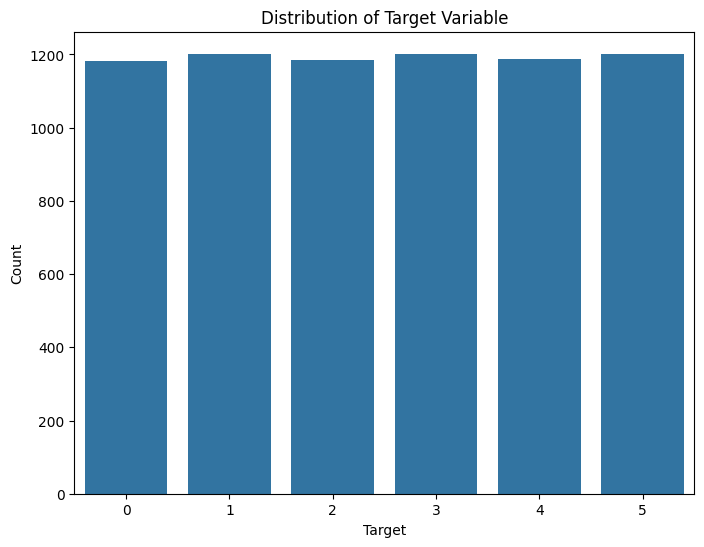

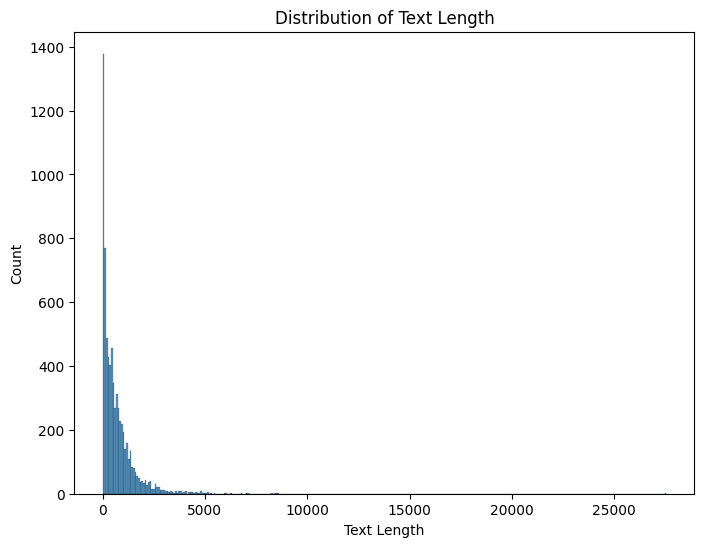

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_new)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# You can also visualize other aspects of the dataset, such as:
# - Word cloud of the text data
# - Length distribution of text data

# Visualizing text length
# Handling missing values in 'text' column before calculating length
df_new['text_length'] = df_new['text'].astype(str).apply(len)  # Convert to string to handle NaN
plt.figure(figsize=(8, 6))
sns.histplot(df_new['text_length'])
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [ ]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove Reddit user mentions (e.g., /u/username)
    text = re.sub(r'/u/\w+', '', text)

    # Remove Reddit subreddit mentions (e.g., /r/subredditname)
    text = re.sub(r'/r/\w+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function
df_new['cleaned_text'] = df_new['text'].apply(lambda x: clean_text(str(x)))

In [ ]:
df_new.head()

,text,target,text_length,cleaned_text
0,Welcome to /r/depression's check-in post - a p...,1,2644,Welcome to s checkin post a place to take a mo...
1,We understand that most people who reply immed...,1,4792,We understand that most people who reply immed...
2,Anyone else just miss physical touch? I crave ...,1,58,Anyone else just miss physical touch I crave i...
3,I’m just so ashamed. Everyone and everything f...,1,905,Im just so ashamed Everyone and everything fee...
4,I really need a friend. I don't even have a si...,1,237,I really need a friend I dont even have a sing...


In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=7d4ed0651d4b6ca740efba48622f89f08597915e71b816eced4c262159688df1
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'  # For cases where detection might fail

# Detect language
df_new['text_language'] = df_new['cleaned_text'].apply(lambda x: detect_language(str(x)))

In [ ]:
# Display the data with language detection
df_new.head()

,text,target,text_length,cleaned_text,text_language
0,Welcome to /r/depression's check-in post - a p...,1,2644,Welcome to s checkin post a place to take a mo...,en
1,We understand that most people who reply immed...,1,4792,We understand that most people who reply immed...,en
2,Anyone else just miss physical touch? I crave ...,1,58,Anyone else just miss physical touch I crave i...,en
3,I’m just so ashamed. Everyone and everything f...,1,905,Im just so ashamed Everyone and everything fee...,en
4,I really need a friend. I don't even have a si...,1,237,I really need a friend I dont even have a sing...,en


In [ ]:
# Remove rows where 'text_language' is english
df_new = df_new[df_new['text_language'] == 'en']

# Display the updated DataFrame
df_new.head()


,text,target,text_length,cleaned_text,text_language
0,Welcome to /r/depression's check-in post - a p...,1,2644,Welcome to s checkin post a place to take a mo...,en
1,We understand that most people who reply immed...,1,4792,We understand that most people who reply immed...,en
2,Anyone else just miss physical touch? I crave ...,1,58,Anyone else just miss physical touch I crave i...,en
3,I’m just so ashamed. Everyone and everything f...,1,905,Im just so ashamed Everyone and everything fee...,en
4,I really need a friend. I don't even have a si...,1,237,I really need a friend I dont even have a sing...,en


In [ ]:
df_new.shape

(6638, 5)

In [ ]:
df_new['target'].value_counts()

,count
target,
1,1191
4,1141
5,1110
2,1085
3,1058
0,1053


In [ ]:
!pip install transformers datasets torch

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00


In [ ]:
!pip install datasets

In [ ]:
# Create an empty list to store the sampled dataframes
dfs_sampled = []

# Iterate through unique target values
for target_value in df_new['target'].unique():
  # Sample 220 rows for the current target value
  df_sampled = df_new[df_new['target'] == target_value].sample(n=220, random_state=42)
  dfs_sampled.append(df_sampled)

# Concatenate the sampled dataframes
df_new_test = pd.concat(dfs_sampled, ignore_index=True)

# Display the first few rows of the new dataframe
df_new_test.head()

,text,target,text_length,cleaned_text,text_language
0,Idk man i feel like im too fucked up to be lov...,1,423,Idk man i feel like im too fucked up to be lov...,en
1,"I'm not saying I have a plan to leave but man,...",1,462,Im not saying I have a plan to leave but man I...,en
2,"i love talking to people who are lonely, i lov...",1,514,i love talking to people who are lonely i love...,en
3,i’ve had depression for five years now. and i’...,1,1249,ive had depression for five years now and ill ...,en
4,I honestly am about to kill myself. I just don...,1,182,I honestly am about to kill myself I just dont...,en


In [ ]:
df_new_test.shape

(1320, 5)

In [ ]:
df_new_test['target'].value_counts()

,count
target,
1,220
0,220
2,220
3,220
4,220
5,220


In [ ]:
!pip install transformers

In [ ]:
!pip install transformers datasets

In [ ]:
!pip install --upgrade transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 53.0 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [ ]:
!pip install --upgrade transformers datasets accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2


In [ ]:
!pip install --upgrade transformers

In [ ]:
# Import necessary libraries
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from transformers.data.data_collator import DataCollatorWithPadding
from datasets import Dataset
import torch
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import random
import nltk
from nltk.corpus import wordnet

# Ensure you have the required NLTK corpus
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Synonym Replacement Function for Data Augmentation
def synonym_replacement(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in ["[PAD]", "[CLS]", "[SEP]"]]))
    random.shuffle(random_word_list)
    num_replaced = 0

    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Stop after n replacements
            break
    return ' '.join(new_words)

In [ ]:
# Augment the training data
def augment_data(df, n_augment=2):
    augmented_texts = []
    augmented_labels = []
    for _, row in df.iterrows():
        text, label = row['cleaned_text'], row['target']
        augmented_texts.append(text)
        augmented_labels.append(label)
        for _ in range(n_augment):
            new_text = synonym_replacement(text)
            augmented_texts.append(new_text)
            augmented_labels.append(label)
    return pd.DataFrame({'cleaned_text': augmented_texts, 'target': augmented_labels})

In [ ]:
# Load dataset
df_train = df_new[['cleaned_text', 'target']]

# Augment the training data
df_augmented = augment_data(df_train)

# Train-validation split
train_texts, train_labels = df_augmented['cleaned_text'], df_augmented['target']
val_texts, val_labels = df_new_test['cleaned_text'], df_new_test['target']

In [ ]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the texts
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Convert data into Hugging Face Dataset format
train_dataset = Dataset.from_pandas(pd.DataFrame({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
}))

val_dataset = Dataset.from_pandas(pd.DataFrame({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
}))

In [ ]:
# Load pretrained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)

# Use DataCollator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer)

# Calculate class weights for handling imbalanced data
class_counts = np.bincount(df_train['target'])
class_weights = torch.tensor([1.0 / count for count in class_counts]).float()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Convert the class_counts numpy array to a Pandas Series for info()
class_counts_series = pd.Series(class_counts)

# Print information about the series
class_counts_series.info()

# Or directly print the shape and data type of class_counts
print("Shape of class_counts:", class_counts.shape)
print("Data type of class_counts:", class_counts.dtype)

<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: None
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 176.0 bytes
Shape of class_counts: (6,)
Data type of class_counts: int64


In [ ]:
# Convert the class_counts numpy array to a Pandas Series for info()
class_weights_series = pd.Series(class_weights)

# Print information about the series
class_weights_series.info()

# Or directly print the shape and data type of class_counts
print("Shape of class_counts:", class_counts.shape)
print("Data type of class_counts:", class_counts.dtype)

<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: None
Non-Null Count  Dtype  
--------------  -----  
6 non-null      float32
dtypes: float32(1)
memory usage: 152.0 bytes
Shape of class_counts: (6,)
Data type of class_counts: int64


In [ ]:
# Custom Trainer class
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))
        loss = loss_fn(logits, labels)
        return (loss, outputs) if return_outputs else loss

# Define Training Arguments with optimizations
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,                   # Increased epochs for better fine-tuning
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=1e-5,                   # Decreased learning rate for better fine-tuning
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    save_total_limit=2,
)

# Initialize CustomTrainer
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator
)

# Train the model
trainer.train()

# Save the fine-tuned model
model.save_pretrained('./depression_classification_bert')
tokenizer.save_pretrained('./depression_classification_bert')

Epoch,Training Loss,Validation Loss


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import numpy as np
# Get predictions on the validation set
predictions = trainer.predict(val_dataset)

# Extract predicted labels and true labels
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

# Calculate precision, recall, F1-score, and accuracy
report = classification_report(true_labels, predicted_labels, target_names=["Stress", "Depression", "Bipolar Disorder", "Personality Disorder", "Anxiety", "Other"])
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

print("Classification Report:\n", report)
print("\nConfusion Matrix:")
print(confusion)
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
# Import necessary libraries
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the fine-tuned model and tokenizer
model = BertForSequenceClassification.from_pretrained('./depression_classification_bert')
tokenizer = BertTokenizer.from_pretrained('./depression_classification_bert')

# Set the model to evaluation mode
model.eval()

# Function to make predictions
def predict(texts):
    # Tokenize the input text
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors='pt')

    # Move input tensors to the same device as the model
    input_ids = encodings['input_ids'].to(model.device)
    attention_mask = encodings['attention_mask'].to(model.device)

    with torch.no_grad():
        # Make predictions
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    # Get the predicted class indices
    predicted_class_indices = torch.argmax(logits, dim=1).cpu().numpy()

    return predicted_class_indices

# Example sentences to predict
sample_texts = [
    "I feel so happy and excited today!",
    "I can't seem to shake off this sadness.",
    "Everything feels overwhelming right now.",
    "I am just fine and content with my life."
]

# Get predictions for the sample texts
predictions = predict(sample_texts)

# Display the results
for text, pred in zip(sample_texts, predictions):
    print(f"Text: '{text}' | Predicted Class: {pred}")  # Adjust class labels based on your target encoding

# Save the fine-tuned model and tokenizer
model.save_pretrained('./depression_classification_bert')
tokenizer.save_pretrained('./depression_classification_bert')

In [ ]:
# Import necessary libraries
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the fine-tuned model and tokenizer
model = BertForSequenceClassification.from_pretrained('./depression_classification_bert')
tokenizer = BertTokenizer.from_pretrained('./depression_classification_bert')

# Set the model to evaluation mode
model.eval()

# Function to make predictions
def predict(texts):
    # Tokenize the input text
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors='pt')

    # Move input tensors to the same device as the model
    input_ids = encodings['input_ids'].to(model.device)
    attention_mask = encodings['attention_mask'].to(model.device)

    with torch.no_grad():
        # Make predictions
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    # Get the predicted class indices
    predicted_class_indices = torch.argmax(logits, dim=1).cpu().numpy()

    return predicted_class_indices

# Example sentences to predict
sample_texts = [
    "I feel overwhelmed with all the deadlines approaching at work.",
    "The constant pressure to perform is making me anxious.",
    "Lately, I feel like I'm in a dark place and can't see a way out.",
    "I experience extreme mood swings, from feeling very high to very low.",
    "Some days I have so much energy, while other days I can hardly get out of bed.",
    "I often find it hard to maintain close relationships because I push people away.",
    "I constantly worry about what might go wrong in my life.",
    "I feel a sense of panic whenever I have to speak in public.",
    "I plan to go grocery shopping later today.",
    "The weather is beautiful today, perfect for a walk in the park."
]

# Get predictions for the sample texts
predictions = predict(sample_texts)

# Display the results
for text, pred in zip(sample_texts, predictions):
    print(f"Text: '{text}' | Predicted Class: {pred}")  # Adjust class labels based on your target encoding

# Save the fine-tuned model and tokenizer
model.save_pretrained('./depression_classification_bert')
tokenizer.save_pretrained('./depression_classification_bert')

In [ ]:
'''# Import necessary libraries
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the fine-tuned model and tokenizer
model = BertForSequenceClassification.from_pretrained('./depression_classification_bert')
tokenizer = BertTokenizer.from_pretrained('./depression_classification_bert')

# Set the model to evaluation mode
model.eval()

# Function to make predictions
def predict(texts):
    # Tokenize the input text
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors='pt')

    # Move input tensors to the same device as the model
    input_ids = encodings['input_ids'].to(model.device)
    attention_mask = encodings['attention_mask'].to(model.device)

    with torch.no_grad():
        # Make predictions
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    # Get the predicted class indices
    predicted_class_indices = torch.argmax(logits, dim=1).cpu().numpy()

    return predicted_class_indices

# Mapping of class indices to class labels (Adjust according to your classes)
class_labels = {
    0: "Stress",
    1: "Depression",
    2: "Bipolar Disorder",
    3: "Personality Disorder",
    4: "Anxiety",
    5: "Normal text"
}

# Function for user input and predictions
def main():
    while True:
        # Get user input
        user_input = input("Enter a sentence to classify (or type 'exit' to quit): ")
        if user_input.lower() == 'exit':
            break

        # Get predictions for the user input
        predictions = predict([user_input])

        # Display the results
        predicted_class = predictions[0]
        print(f"Text: '{user_input}' | Predicted Class: {class_labels[predicted_class]}")

# Run the main function to start the input loop
main()'''



'# Import necessary libraries\nimport torch\nfrom transformers import BertTokenizer, BertForSequenceClassification\n\n# Load the fine-tuned model and tokenizer\nmodel = BertForSequenceClassification.from_pretrained(\'./depression_classification_bert\')\ntokenizer = BertTokenizer.from_pretrained(\'./depression_classification_bert\')\n\n# Set the model to evaluation mode\nmodel.eval()\n\n# Function to make predictions\ndef predict(texts):\n    # Tokenize the input text\n    encodings = tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors=\'pt\')\n\n    # Move input tensors to the same device as the model\n    input_ids = encodings[\'input_ids\'].to(model.device)\n    attention_mask = encodings[\'attention_mask\'].to(model.device)\n\n    with torch.no_grad():\n        # Make predictions\n        outputs = model(input_ids, attention_mask=attention_mask)\n        logits = outputs.logits\n\n    # Get the predicted class indices\n    predicted_class_indices = torch.a

In [ ]:
!pip install streamlit transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.19.96.174


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) 

In [ ]:
!streamlit run --help

Usage: streamlit run [OPTIONS] TARGET [ARGS]...

  Run a Python script, piping stderr to Streamlit.

  The script can be local or it can be an url. In the latter case, Streamlit
  will download the script to a temporary file and runs this file.

Options:
  --global.disableWidgetStateDuplicationWarning BOOLEAN
                                  By default, Streamlit displays a warning
                                  when a user sets both a widget default value
                                  in the function defining the widget and a
                                  widget value via the widget's key in
                                  `st.session_state`.
                                  
                                  If you'd like to turn off this warning, set
                                  this to True.  [env var: STREAMLIT_GLOBAL_DI
                                  SABLE_WIDGET_STATE_DUPLICATION_WARNING]
  --global.showWarningOnDirectExecution BOOLEAN
                    

In [ ]:
!pip install localtunnel@2.0.2

ERROR: Could not install packages due to an OSError: Invalid URL '2.0.2': No scheme supplied. Perhaps you meant https://2.0.2?

